In [19]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt



In [20]:
folder_path = "/Users/pannapfandler/Documents/GitHub/2022-23d-1fcmgt-reg-ai-01-group-team9/Code & Data/data_merged"
file_name = "full_join.geojson"
file_path = os.path.join(folder_path, file_name)

with open(file_path) as file:
    data = json.load(file)

# Convert GeoJSON features to DataFrame
df = pd.json_normalize(data["features"])

print(df.head())

      type properties.regions properties.neighborhood  properties.light_count  \
0  Feature              Bavel                   Bavel                    1253   
1  Feature              Bavel      Buitengebied Bavel                     308   
2  Feature              Bavel         Nieuw Wolfslaar                     515   
3  Feature      Breda centrum                  Chassé                     647   
4  Feature      Breda centrum                    City                     668   

   properties.sport_building_count  properties.workplace_count  \
0                                2                           2   
1                                6                           1   
2                                0                           0   
3                                0                           3   
4                                0                           3   

   properties.inhabitants  properties.light_per_1000  \
0                    5445                 230.119376   
1   

In [21]:
# Remove the "properties." prefix from column names
df.columns = df.columns.str.replace('properties.', '')

print(df.columns)


Index(['type', 'regions', 'neighborhood', 'light_count',
       'sport_building_count', 'workplace_count', 'inhabitants',
       'light_per_1000', 'sport_building_per_1000', 'area_sqkm',
       'distance_from_centre_km', 'drug_store_count', 'green_score',
       'livability_score', 'jobs_count', 'price_2015', 'price_2016',
       'price_2017', 'price_2018', 'price_2019', 'price_2020', 'price_2021',
       'price_2022', 'Accidents (road)', 'Encroachment on public order',
       'Fraud (other)', 'Horizontal Fraud', 'Human trafficking',
       'Nature and landscape', 'Quality of life (other)', 'Road (other)',
       'Spatial planning', 'Special Laws', 'Transport of hazardous substances',
       'Under the influence (water)', 'Abuse', 'Air (other)', 'Animals',
       'Arms Trade', 'Building materials', 'Cybercrime', 'Discrimination',
       'Domestic Violation', 'Drug trafficking', 'Drugs/drink nuisance',
       'Fire/Explosion', 'Fireworks', 'Food safety', 'Home theft/burglary',
       'I

/var/folders/0w/3fzkjw4n48q_xwgc_j665ynh0000gn/T/ipykernel_9434/2715113675.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('properties.', '')


In [22]:
df.head(10)

,type,regions,neighborhood,light_count,sport_building_count,workplace_count,inhabitants,light_per_1000,sport_building_per_1000,area_sqkm,...,Noise nuisance event,Other noise nuisance,Childcare,Education,Health and well-being,Hospitality,Retail,proximity_score,geometry.type,geometry.coordinates
0,Feature,Bavel,Bavel,1253,2,2,5445,230.119376,0.367309,1.750374,...,3.0,24.0,11.3,2.6,3.5,10.7,15.8,8.78,Polygon,"[[[4.83844309597122, 51.5611959297551], [4.839..."
1,Feature,Bavel,Buitengebied Bavel,308,6,1,570,540.350877,10.526316,8.559273,...,1.0,12.0,12.6,3.3,3.1,13.1,15.2,9.46,Polygon,"[[[4.87111922527449, 51.5669557750773], [4.870..."
2,Feature,Bavel,Nieuw Wolfslaar,515,0,0,2365,217.758985,0.000000,1.027985,...,NaN,NaN,34.3,6.1,7.4,40.5,36.4,24.94,Polygon,"[[[4.81439523319848, 51.5597960650982], [4.814..."
3,Feature,Breda centrum,Chassé,647,0,3,3365,192.273403,0.000000,0.408947,...,NaN,NaN,83.3,16.2,17.5,423.9,156.3,139.44,Polygon,"[[[4.78151894665329, 51.5824413877568], [4.781..."
4,Feature,Breda centrum,City,668,0,3,2575,259.417476,0.000000,0.435064,...,1.0,37.0,80.0,17.5,16.4,420.5,152.3,137.34,Polygon,"[[[4.77888736395126, 51.5864083087067], [4.779..."
5,Feature,Breda centrum,Fellenoord,240,0,2,1565,153.354633,0.000000,0.277823,...,0.0,44.0,79.2,16.7,15.5,424.4,148.6,136.88,Polygon,"[[[4.77310206482658, 51.5822784589426], [4.773..."
6,Feature,Breda centrum,Schorsmolen,329,0,1,3450,95.362319,0.000000,0.276399,...,NaN,NaN,68.5,15.8,15.0,415.9,141.6,131.36,Polygon,"[[[4.77017667154176, 51.588333908452], [4.7701..."
7,Feature,Breda centrum,Station,318,0,3,2310,137.662338,0.000000,0.291627,...,0.0,35.0,62.9,16.7,14.4,392.7,141.4,125.62,Polygon,"[[[4.79095613186657, 51.5945532567226], [4.790..."
8,Feature,Breda centrum,Valkenberg,402,0,3,2005,200.498753,0.000000,0.414723,...,0.0,33.0,75.1,19.1,17.7,408.9,154.3,135.02,Polygon,"[[[4.78874210797318, 51.5930255244126], [4.788..."
9,Feature,Breda noord,Belcrum,637,0,4,4005,159.051186,0.000000,0.532119,...,0.0,11.0,54.0,12.7,12.1,374.6,131.2,116.92,Polygon,"[[[4.7745719563342, 51.5947380238086], [4.7743..."


# Calculate correlation coefficient

In [23]:
correlation_matrix = df.drop(columns=['price_2021', 'price_2020', 'price_2019', 'price_2018', 'price_2017', 'price_2016', 'price_2015']).corr()

# Sort the correlation matrix by 'price_2022' column
sorted_correlation = correlation_matrix['price_2022'].sort_values(ascending=False)

# Exclude 'price_2022' from the sorted correlations
sorted_correlation = sorted_correlation[sorted_correlation.index != 'price_2022']

# Display the eight highest correlations
top_8_correlations = sorted_correlation.head(8)
print(top_8_correlations)

livability_score                     0.680013
area_sqkm                            0.625488
green_score                          0.525670
distance_from_centre_km              0.462606
Noise nuisance event                 0.322529
sport_building_count                 0.157902
sport_building_per_1000              0.153542
Transport of hazardous substances    0.101846
Name: price_2022, dtype: float64


In [26]:
correlation_matrix = df.drop(columns=['price_2021', 'price_2020', 'price_2019', 'price_2018', 'price_2017', 'price_2016', 'price_2015']).corr()

# Sort the correlation matrix by 'house_price' column
sorted_correlation = correlation_matrix['livability_score'].sort_values(ascending=False)

# Display the five highest correlations
top_5_correlations = sorted_correlation.head(5)
print(top_5_correlations)

livability_score           1.000000
price_2022                 0.680013
distance_from_centre_km    0.452508
green_score                0.400791
area_sqkm                  0.347075
Name: livability_score, dtype: float64


In [27]:
correlation_matrix = df.corr()

# Sort the correlation matrix by 'house_price' column
sorted_correlation = correlation_matrix['green_score'].sort_values(ascending=False)

# Display the five highest correlations
top_5_correlations = sorted_correlation.head(5)
print(top_5_correlations)

green_score                1.000000
distance_from_centre_km    0.719067
area_sqkm                  0.630594
price_2022                 0.525670
price_2020                 0.522647
Name: green_score, dtype: float64


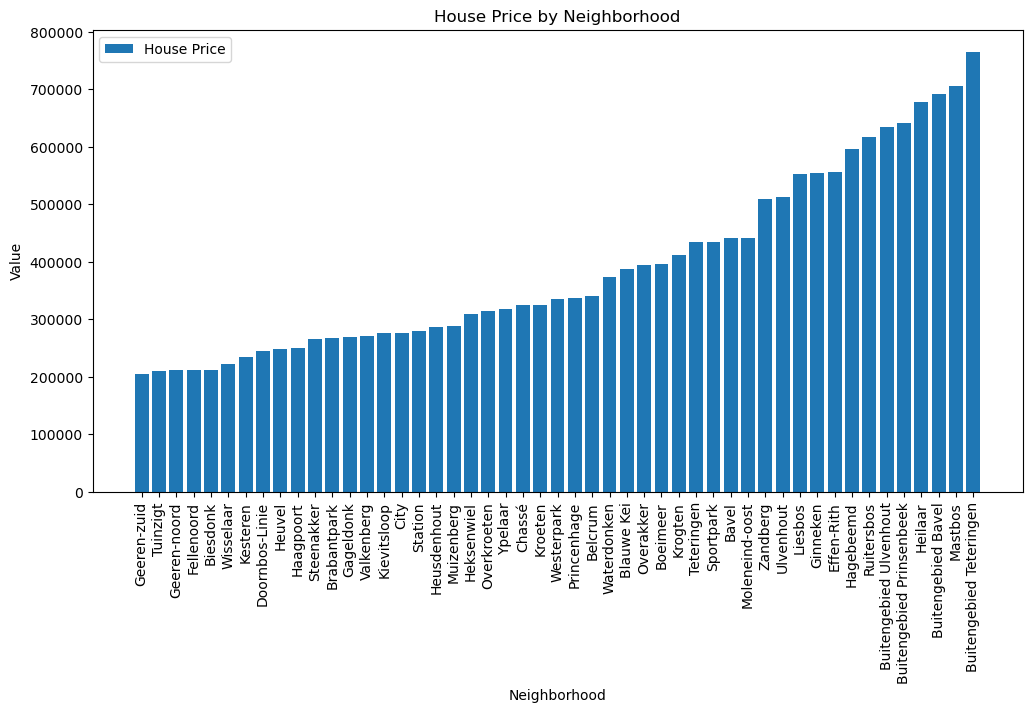

In [30]:
df_subset = df[['neighborhood', 'price_2022', 'livability_score']].dropna()

df_subset = df_subset[df_subset['price_2022'] > 0]

sorted_neighborhoods = df_subset.sort_values(by='price_2022', ascending=True)

plt.figure(figsize=(12, 6))
plt.bar(sorted_neighborhoods['neighborhood'], sorted_neighborhoods['price_2022'], label='House Price')
plt.xlabel('Neighborhood')
plt.ylabel('Value')
plt.title('House Price by Neighborhood')
plt.xticks(rotation=90)
plt.legend()
plt.show()

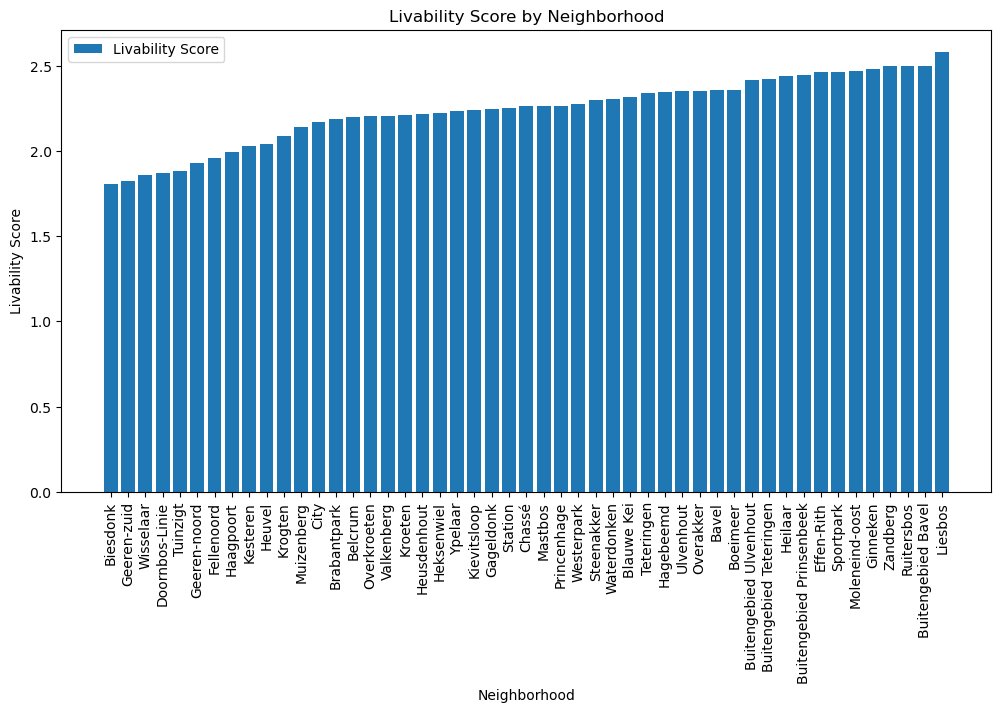

In [31]:
sorted_neighborhoods = df_subset.sort_values(by='livability_score', ascending=True)

plt.figure(figsize=(12, 6))
plt.bar(sorted_neighborhoods['neighborhood'], sorted_neighborhoods['livability_score'], label='Livability Score')
plt.xlabel('Neighborhood')
plt.ylabel('Livability Score')
plt.title('Livability Score by Neighborhood')
plt.xticks(rotation=90)
plt.legend()
plt.show()

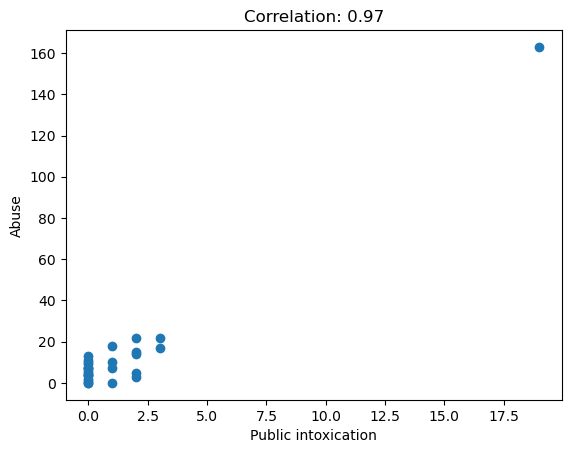

In [32]:
correlation = df['Public intoxication'].corr(df['Abuse'])

plt.scatter(df['Public intoxication'], df['Abuse'])
plt.xlabel('Public intoxication')
plt.ylabel('Abuse')
plt.title('Correlation: {:.2f}'.format(correlation))
plt.show()

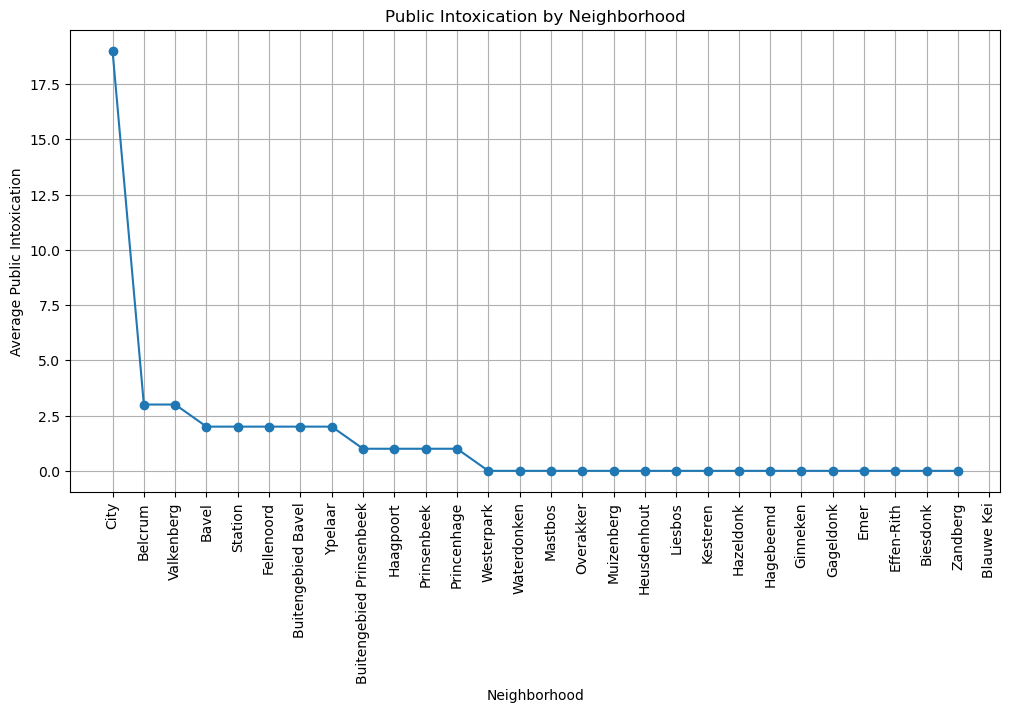

In [33]:
subset = df[['neighborhood', 'Public intoxication']]

grouped_data = subset.groupby('neighborhood')['Public intoxication'].mean()

sorted_data = grouped_data.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.plot(sorted_data.index, sorted_data.values, marker='o')
plt.xlabel('Neighborhood')
plt.ylabel('Average Public Intoxication')
plt.title('Public Intoxication by Neighborhood')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

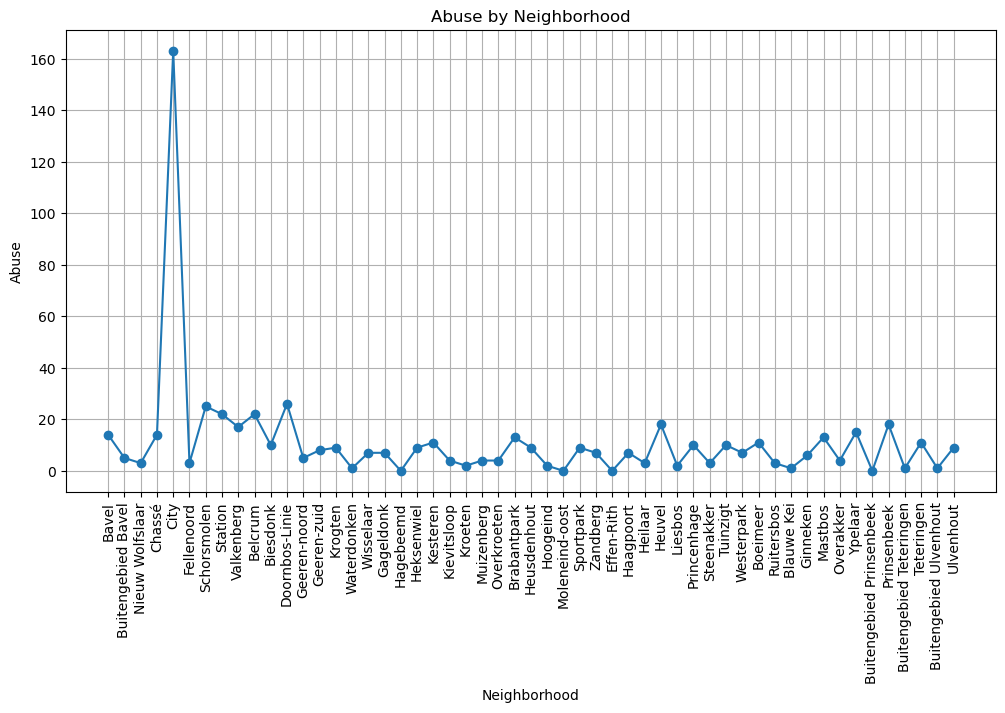

In [ ]:
subset = df[['neighborhood', 'Abuse']]

plt.figure(figsize=(12, 6))
plt.plot(subset['neighborhood'], subset['Abuse'], marker='o')
plt.xlabel('Neighborhood')
plt.ylabel('Abuse')
plt.title('Abuse by Neighborhood')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

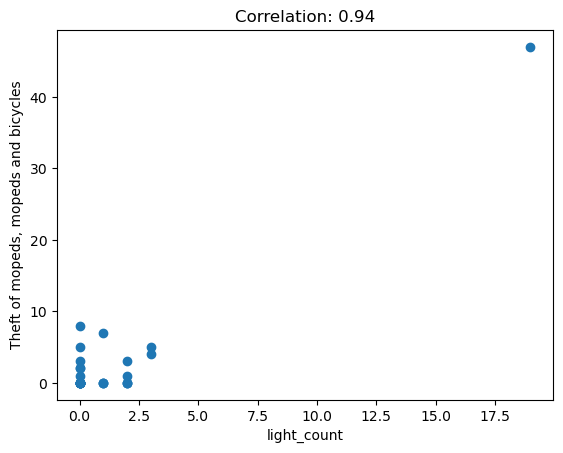

In [34]:
correlation = df['Public intoxication'].corr(df['drug_store_count'])

plt.scatter(df['Public intoxication'], df['drug_store_count'])
plt.xlabel('light_count')
plt.ylabel('Theft of mopeds, mopeds and bicycles')
plt.title('Correlation: {:.2f}'.format(correlation))
plt.show()

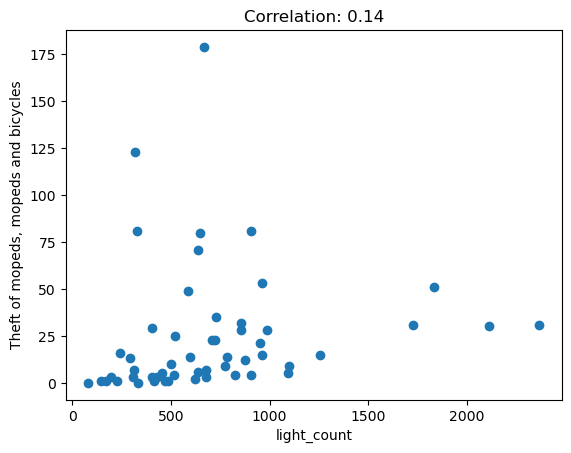

In [ ]:
correlation = df['light_count'].corr(df['Theft of mopeds, mopeds and bicycles'])

plt.scatter(df['light_count'], df['Theft of mopeds, mopeds and bicycles'])
plt.xlabel('light_count')
plt.ylabel('Theft of mopeds, mopeds and bicycles')
plt.title('Correlation: {:.2f}'.format(correlation))
plt.show()

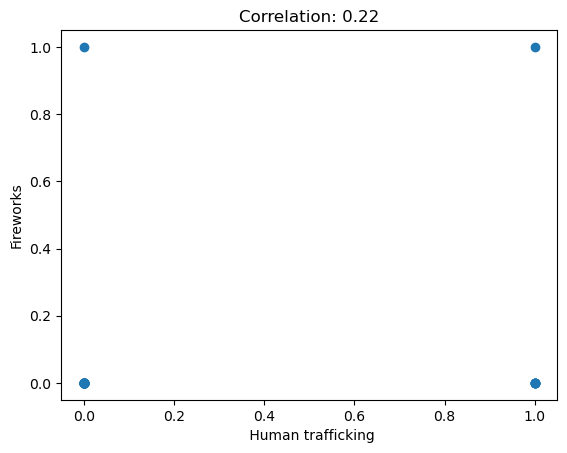

In [ ]:
correlation = df['Human trafficking'].corr(df['Fireworks'])

plt.scatter(df['Human trafficking'], df['Fireworks'])
plt.xlabel(' Human trafficking')
plt.ylabel('Fireworks')
plt.title('Correlation: {:.2f}'.format(correlation))
plt.show()